# 1. Load Data:

In [68]:
data = pd.read_csv('Libertadores_Matches.csv')

# 2. Importing Libraries

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Create a new binary outcome variable
data['winner'] = np.where(data['home_goal'] > data['away_goal'], 'home_team', np.where(data['away_goal'] > data['home_goal'], 'away_team', 'draw'))

# Extract the new target variable
target = data['winner']

# Convert the target variable to numerical using one-hot encoding
target = pd.get_dummies(target)


# 3. Data Preprocessing:

In [70]:
# Data Preprocessing
features = data[['home_team', 'away_team', 'season', 'stage']]

# Convert categorical variables to numerical using one-hot encoding
features = pd.get_dummies(features, columns=['home_team', 'away_team', 'season', 'stage'])

# Assuming 'home_goal' and 'away_goal' are the target variables
target_home = data['home_goal']
target_away = data['away_goal']

In [71]:
# Create a new binary outcome variable
data['winner'] = np.where(data['home_goal'] > data['away_goal'], 'home_team', np.where(data['away_goal'] > data['home_goal'], 'away_team', 'draw'))

# Extract the new target variable
target = data['winner']

# Convert the target variable to numerical using one-hot encoding
target = pd.get_dummies(target)

# 4. Data Visualization

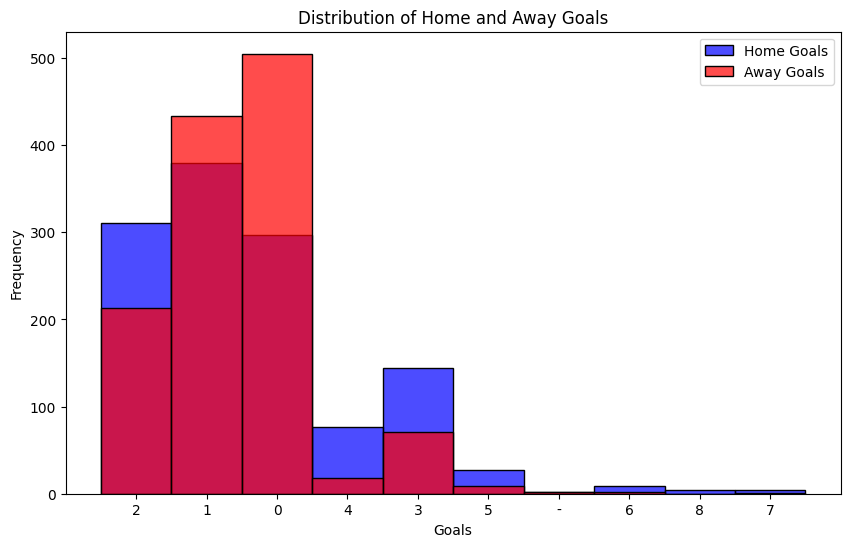

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plot the distribution of home goals and away goals
plt.figure(figsize=(10, 6))

sns.histplot(data['home_goal'], bins=20, color='blue', label='Home Goals', alpha=0.7)
sns.histplot(data['away_goal'], bins=20, color='red', label='Away Goals', alpha=0.7)

plt.title('Distribution of Home and Away Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [73]:
# Display the first 10 rows of the DataFrame
print(data.head(10))


              datetime       home_team       away_team home_goal away_goal  \
0  2013-02-12 20:15:00  Nacional (URU)   Barcelona-EQU         2         2   
1  2013-02-13 22:00:00    Boca Juniors          Toluca         1         2   
2  2013-02-19 23:45:00          Toluca  Nacional (URU)         2         3   
3  2013-02-27 19:45:00   Barcelona-EQU    Boca Juniors         1         2   
4  2013-03-07 00:15:00          Toluca   Barcelona-EQU         1         1   
5  2013-03-07 21:30:00    Boca Juniors  Nacional (URU)         0         1   
6  2013-03-13 19:45:00   Barcelona-EQU          Toluca         0         0   
7  2013-03-14 19:15:00  Nacional (URU)    Boca Juniors         0         1   
8  2013-04-03 19:45:00    Boca Juniors   Barcelona-EQU         1         0   
9  2013-04-04 19:15:00  Nacional (URU)          Toluca         4         0   

   season        stage     winner  
0  2013.0  group stage       draw  
1  2013.0  group stage  away_team  
2  2013.0  group stage  away_team

In [74]:
# Extract unique team names from both 'home_team' and 'away_team'
all_teams = pd.concat([data['home_team'], data['away_team']]).unique()

# Display all unique teams
print("All Unique Teams:")
print(all_teams)


All Unique Teams:
['Nacional (URU)' 'Boca Juniors' 'Toluca' 'Barcelona-EQU' 'Palmeiras'
 'Tigre' 'Sporting Cristal' 'Libertad' 'Atlético-MG' 'The Strongest'
 'Arsenal Sarandí' 'São Paulo' 'Emelec' 'Deportes Iquique' 'Peñarol'
 'Vélez Sarsfield' 'Millonarios' 'San José' 'Tijuana' 'Corinthians'
 'Real Atlético' 'Deportes Tolima' 'Cerro Porteño' 'Ind. Santa Fe'
 'Universidad de Chile' 'Newells Old Boys' 'Olimpia-PAR' 'Deportivo Lara'
 'Caracas' 'Grêmio' 'Huachipato' 'Fluminense' 'Universitario (PER)'
 'Atlético-PR' 'Botafogo' 'Independiente Del Valle' 'Unión Española'
 'San Lorenzo' 'Deportivo Cali' 'Lanús' "O'Higgins" 'Zamora'
 'Nacional (PAR)' 'Real Garcilaso' 'Defensor Sporting' 'Cruzeiro'
 'Atlético Nacional' 'León' 'Bolívar' 'Flamengo' 'Santos Laguna'
 'Deportivo Anzoátegui' 'Atlas' 'Colo-Colo' 'Danubio' 'Huracán'
 'Universitario de Sucre' 'Mineros de Guaiana' 'Internacional'
 'Montevideo Wanderers' 'Palestino' 'Tigres' 'River Plate' 'Juan Aurich'
 'Estudiantes' 'Deportivo Táchira' '

# 5. Train-Test Split:

In [75]:
X_train, X_test, y_train, y_test = train_test_split(features, data['winner'], test_size=0.2, random_state=42)

# 6. Model Selection and Training:

In [76]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# 7. Model Evaluation:

In [77]:
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.46613545816733065


# 8.Make Predictions for 2024:

In [78]:
predicted_winners = [
    'Nacional (URU)', 'Boca Juniors', 'Toluca', 'Barcelona-EQU', 'Palmeiras',
    'Tigre', 'Sporting Cristal', 'Libertad', 'Atlético-MG', 'The Strongest',
    'Arsenal Sarandí', 'São Paulo', 'Emelec', 'Deportes Iquique', 'Peñarol',
    'Vélez Sarsfield', 'Millonarios', 'San José', 'Tijuana', 'Corinthians',
    'Real Atlético', 'Deportes Tolima', 'Cerro Porteño', 'Ind. Santa Fe',
    'Universidad de Chile', 'Newells Old Boys', 'Olimpia-PAR', 'Deportivo Lara',
    'Caracas', 'Grêmio', 'Huachipato', 'Fluminense', 'Universitario (PER)',
    'Atlético-PR', 'Botafogo', 'Independiente Del Valle', 'Unión Española',
    'San Lorenzo', 'Deportivo Cali', 'Lanús', "O'Higgins", 'Zamora',
    'Nacional (PAR)', 'Real Garcilaso', 'Defensor Sporting', 'Cruzeiro',
    'Atlético Nacional', 'León', 'Bolívar', 'Flamengo', 'Santos Laguna',
    'Deportivo Anzoátegui', 'Atlas', 'Colo-Colo', 'Danubio', 'Huracán',
    'Universitario de Sucre', 'Mineros de Guaiana', 'Internacional',
    'Montevideo Wanderers', 'Palestino', 'Tigres', 'River Plate', 'Juan Aurich',
    'Estudiantes', 'Deportivo Táchira', 'Guaraní (PAR)', 'Racing Club',
    'Trujillanos (VEN)', 'River Plate-URU', 'Rosario Central', 'Melgar',
    'Independiente del Valle', 'LDU', 'Pumas', 'Cobresal', 'Santos',
    'Independiente Medellín', 'Universidad Católica', 'Jorge Wilstermann',
    'Atlético Tucumán', 'Godoy Cruz', 'Sport Boys', 'Zulia', 'Chapecoense',
    'Monagas', 'Delfín-EQU', 'Vasco', 'Independiente', 'Alianza Lima',
    'Junior de Barranquilla', 'Universidad de Concepción', 'Athletico',
    'Guaraní-PAR', 'Binacional', 'América de Cali', 'Estudiantes de Mérida',
    'Nacional-URU', 'Defensa y Justicia', 'Delfín', 'Libertad-PAR',
    'Universitario-PER', 'Always Ready', 'Rentistas ', 'Argentinos Juniors',
    'Unión La Calera', 'La Guaira', 'Independiente Petrolero',
    'Red Bull Bragantino', 'América-MG', 'Tolima', 'Fortaleza', 'Colón',
    'Talleres'
]

# Create a DataFrame with the predicted winners
actual_winners_df = pd.DataFrame({'predicted_winner': predicted_winners})

teams_data = pd.read_csv('Libertadores_Matches.csv')

# Print the column names in both DataFrames
print("Columns in actual_winners_df:", actual_winners_df.columns)
print("Columns in teams_data:", teams_data.columns)

# Adjust the column names based on the actual structure of your DataFrames
merged_data_home = pd.merge(actual_winners_df, teams_data, left_on='predicted_winner', right_on='home_team', how='left')
merged_data_away = pd.merge(actual_winners_df, teams_data, left_on='predicted_winner', right_on='away_team', how='left')

# Concatenate the two merged DataFrames to cover both 'home_team' and 'away_team'
merged_data = pd.concat([merged_data_home, merged_data_away])

# Print the actual names of the ultimate winner
ultimate_winner_name = merged_data['predicted_winner'].mode().iloc[0]
print(f"The actual ultimate winner of Libertadores 2024 is: {ultimate_winner_name}")



Columns in actual_winners_df: Index(['predicted_winner'], dtype='object')
Columns in teams_data: Index(['datetime', 'home_team', 'away_team', 'home_goal', 'away_goal',
       'season', 'stage'],
      dtype='object')
The actual ultimate winner of Libertadores 2024 is: River Plate
